# **Importing Needed Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

# **Loading Data**

In [4]:
df = pd.read_csv("/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv")

In [5]:
df.head(10)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
5,3656926,(2014 BT8),25.00,0.026580,0.059435,Earth,47477.649832,4.290521e+07,False
6,3421513,(2008 OX1),21.50,0.133216,0.297879,Earth,57853.295346,2.727908e+07,True
7,3541504,(2010 OF101),19.75,0.298233,0.666868,Earth,46972.486794,6.997593e+07,False
8,3836942,(2018 YH),21.70,0.121494,0.271669,Earth,37424.548382,5.657727e+06,True
9,3892166,(2019 UP13),23.45,0.054269,0.121350,Earth,38524.867869,6.166118e+07,False


# **Exploring Data**

In [6]:
df.shape

(338199, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [8]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [9]:
df["orbiting_body"].value_counts()

orbiting_body
Earth    338199
Name: count, dtype: int64

In [10]:
df['is_hazardous'].value_counts()

is_hazardous
False    295037
True      43162
Name: count, dtype: int64

***The Data is not Balanced***

In [11]:
pd.DataFrame(df["name"].value_counts()[0:10])

,count
name,
277810 (2006 FV35),211
469219 Kamo`oalewa (2016 HO3),197
(2014 OL339),192
(2017 FZ2),186
(2023 FW13),169
(2022 YF4),151
164207 (2004 GU9),135
85770 (1998 UP1),101
138852 (2000 WN10),99


In [12]:
df.duplicated().sum()

0

***We don't have any duplicates***

In [13]:
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

***Handling Missing Values***

In [14]:
df.isnull().sum() / df.shape[0]

neo_id                    0.000000
name                      0.000000
absolute_magnitude        0.000083
estimated_diameter_min    0.000083
estimated_diameter_max    0.000083
orbiting_body             0.000000
relative_velocity         0.000000
miss_distance             0.000000
is_hazardous              0.000000
dtype: float64

In [15]:
df.fillna({
    'absolute_magnitude': df['absolute_magnitude'].mean(),
    'estimated_diameter_min': df['estimated_diameter_min'].mean(),
    'estimated_diameter_max': df['estimated_diameter_max'].mean()
}, inplace=True)

In [16]:
df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

# **Exploratory Data Anlaysis & Visualization**

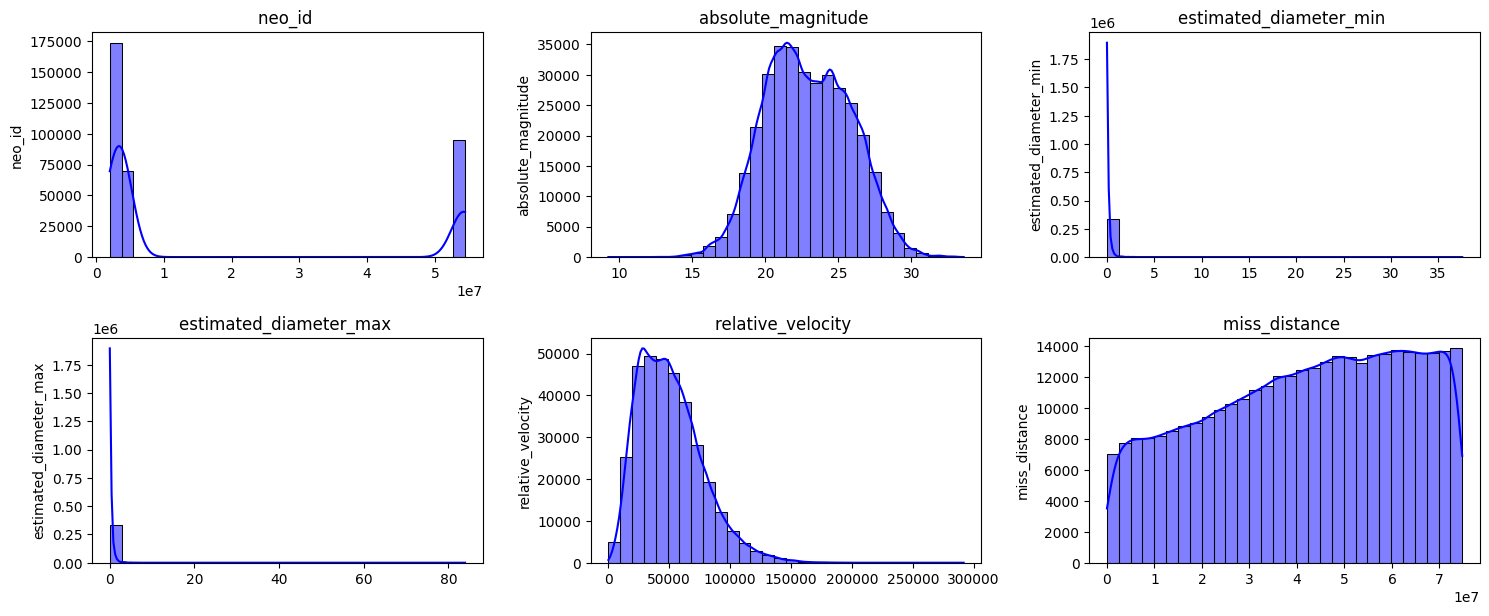

In [17]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=df, x=feature, bins=30, kde=True, color='blue')
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

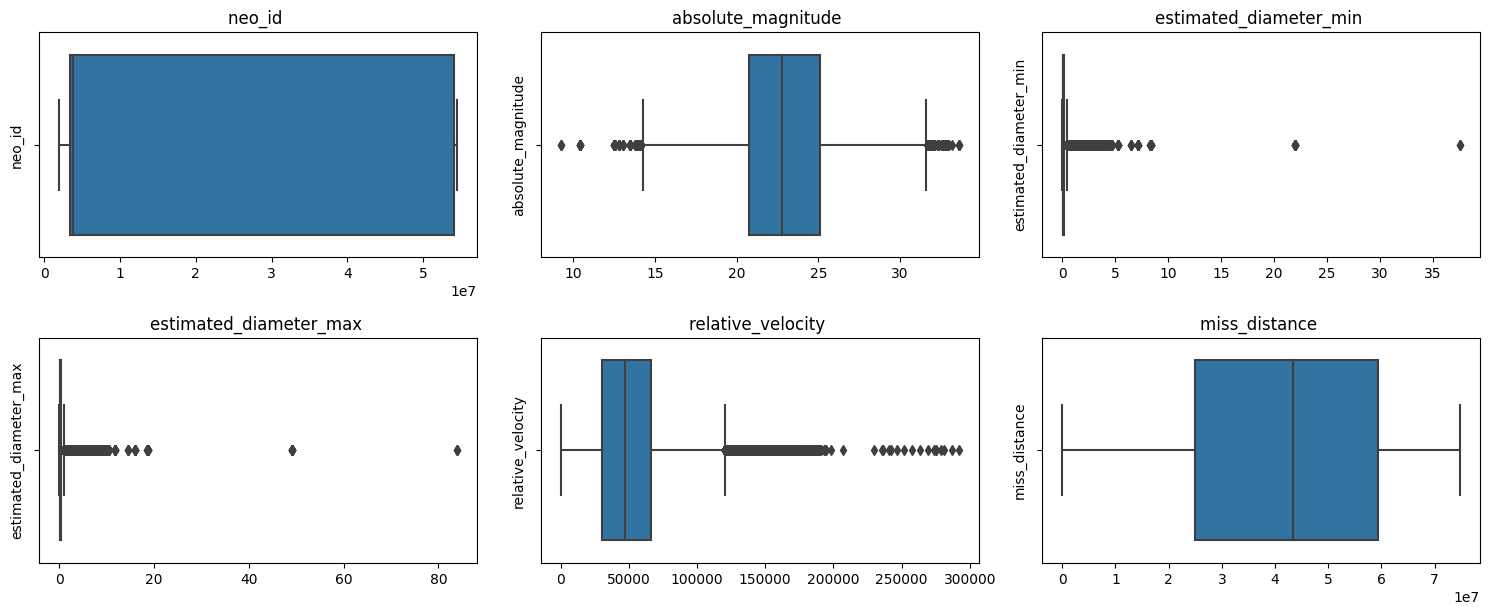

In [18]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

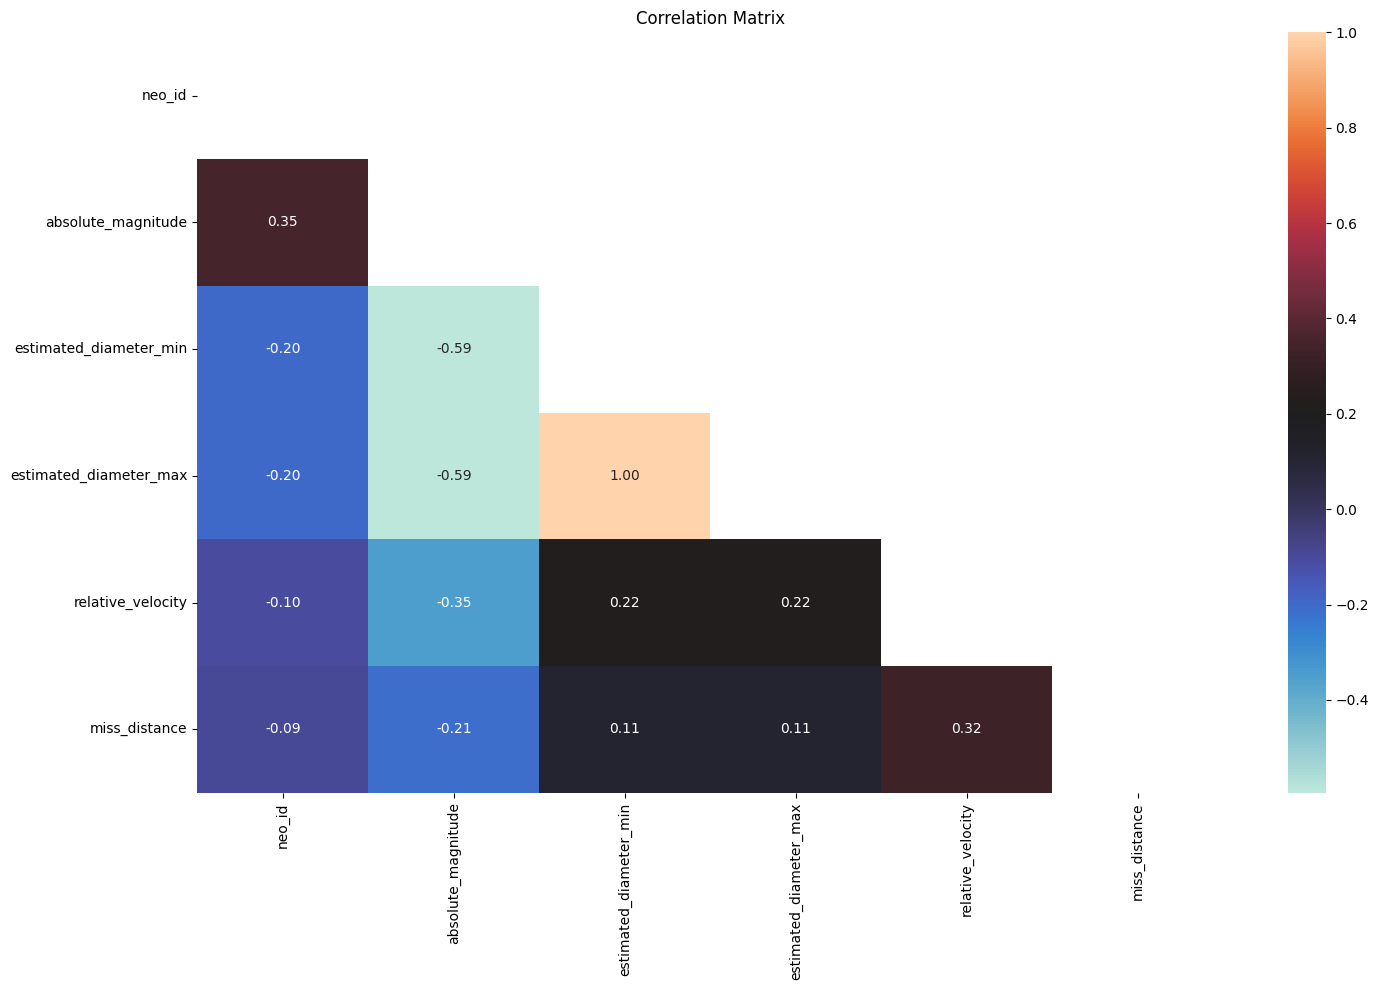

In [19]:
corr = df.select_dtypes(include='number').corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

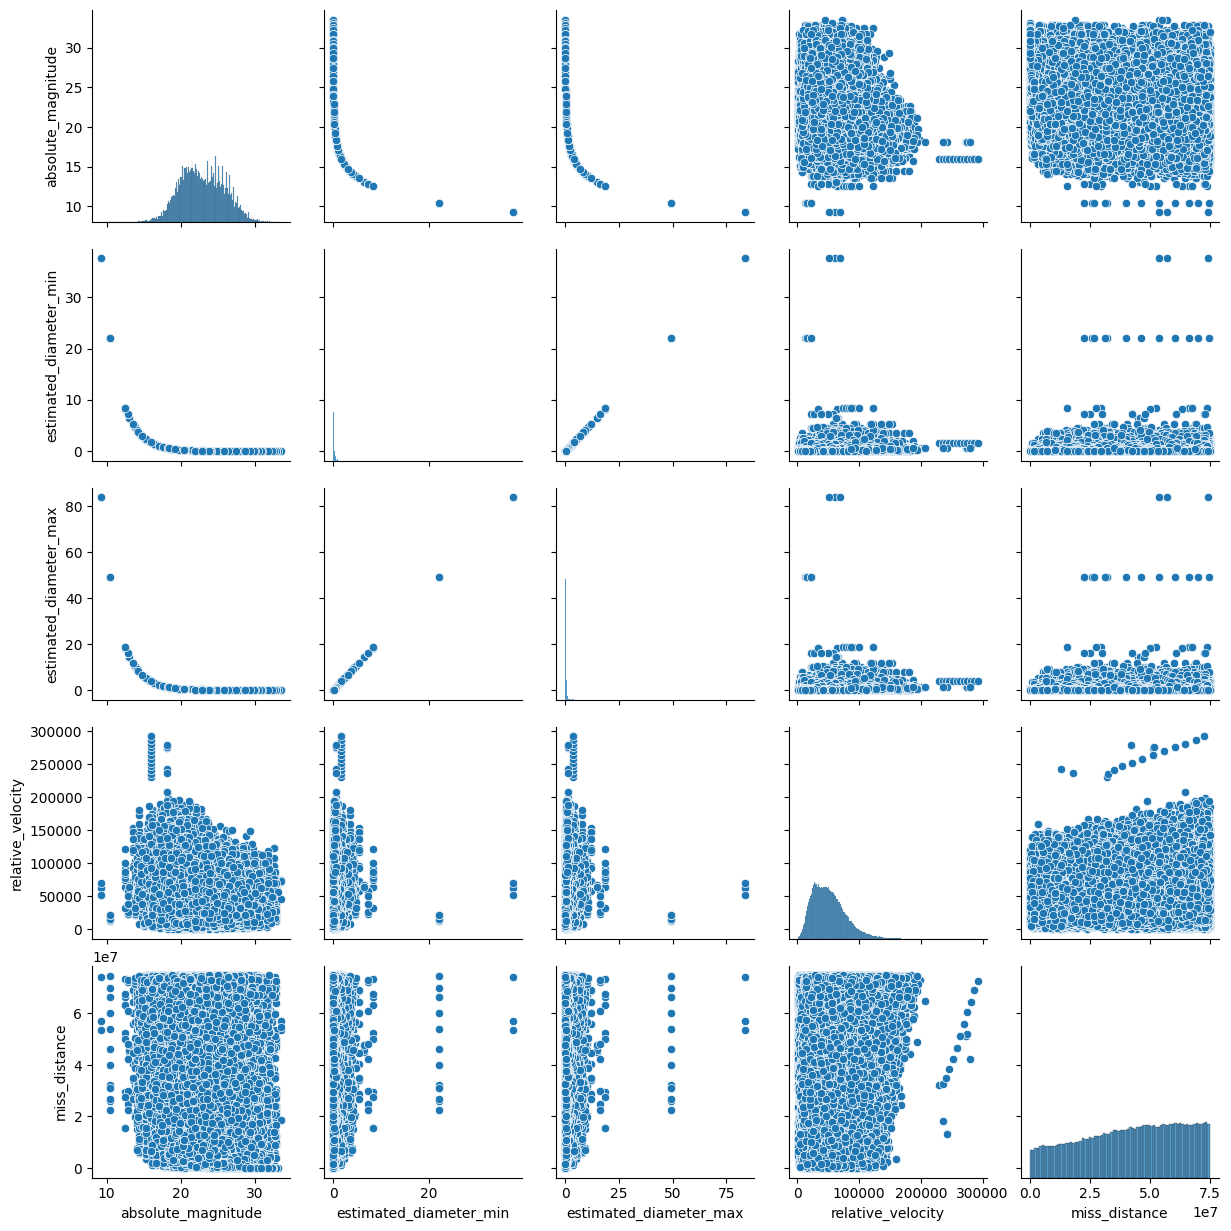

In [20]:
sns.pairplot(df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                 'relative_velocity', 'miss_distance']].dropna())
plt.show()

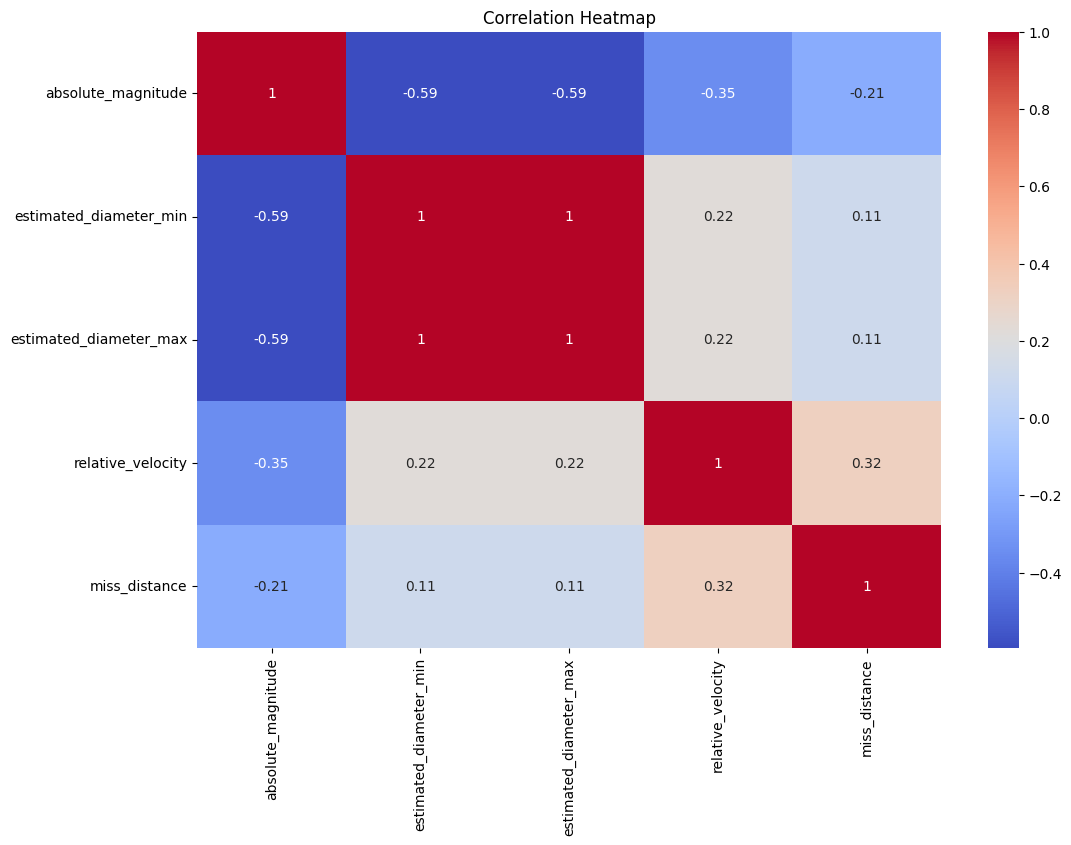

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

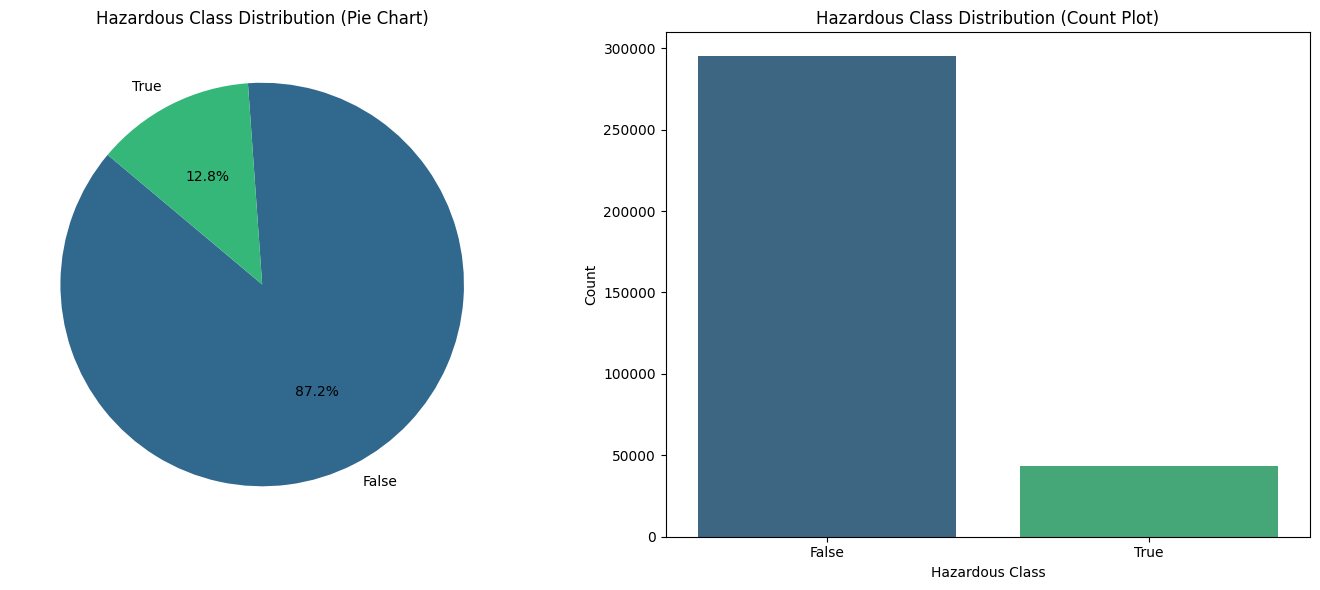

In [22]:
hazardous_counts = df['is_hazardous'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=len(hazardous_counts))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(hazardous_counts, labels=df["is_hazardous"].unique(), autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Hazardous Class Distribution (Pie Chart)')
sns.countplot(x='is_hazardous', data=df, ax=ax2, palette=palette)
ax2.set_title('Hazardous Class Distribution (Count Plot)')
ax2.set_xlabel('Hazardous Class')
ax2.set_ylabel('Count')
ax2.set_xticklabels(df["is_hazardous"].unique())
plt.tight_layout()
plt.show()

***The "is_hazardous" column is imbalancedm, So we should handle this imbalanced data***

# ***Data Preprocessing***

In [23]:
categorical_features = df.select_dtypes(include=['object', 'category','bool']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['name', 'orbiting_body', 'is_hazardous']
Numerical Features: ['neo_id', 'absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']


In [24]:
label_encoding = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoding.fit_transform(df[col])

In [25]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,30603,19.14,0.394962,0.883161,0,71745.401048,5.814362e+07,0
1,2349507,31395,18.50,0.530341,1.185878,0,109949.757148,5.580105e+07,1
2,2455415,32118,21.45,0.136319,0.304818,0,24865.506798,6.720689e+07,0
3,3132126,736,20.63,0.198863,0.444672,0,78890.076805,3.039644e+07,0
4,3557844,4880,22.70,0.076658,0.171412,0,56036.519484,6.311863e+07,0


## ***Feature Selection***

In [26]:
correlation_matrix = df.corr()
print(correlation_matrix['is_hazardous'].sort_values(ascending=False))

is_hazardous              1.000000
relative_velocity         0.187021
estimated_diameter_min    0.164840
estimated_diameter_max    0.164840
name                      0.120058
miss_distance            -0.006540
neo_id                   -0.156748
absolute_magnitude       -0.343994
orbiting_body                  NaN
Name: is_hazardous, dtype: float64


### ***name, neo_id, orbiting_body don't have a significant impact on the target***  

In [27]:
df = df.drop(columns=['name', 'neo_id', 'orbiting_body', ])

In [28]:
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


In [29]:
numerical_features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 
                       'relative_velocity', 'miss_distance']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [30]:
df.head(20)

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,-1.302784,0.755562,0.755562,0.783537,0.799476,0
1,-1.522633,1.186882,1.186882,2.230715,0.686711,1
2,-0.509268,-0.068479,-0.068479,-0.992271,1.235756,0
3,-0.790949,0.130790,0.130790,1.054176,-0.536196,0
4,-0.079876,-0.258559,-0.258559,0.188485,1.038958,0
5,0.710206,-0.418107,-0.418107,-0.135724,0.065941,0
6,-0.492092,-0.078365,-0.078365,0.257304,-0.686257,1
7,-1.093241,0.447382,0.447382,-0.154860,1.369050,0
8,-0.423389,-0.115710,-0.115710,-0.516535,-1.727048,1
9,0.177760,-0.329888,-0.329888,-0.474855,0.968801,0


## ***Handling Imbalanced Classes Using SMOTE***

In [31]:
X = df.drop(columns=['is_hazardous'])
y = df['is_hazardous']

In [32]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Original target distribution: {y.value_counts()}')
print(f'Resampled target distribution: {pd.Series(y_resampled).value_counts()}')

Original target distribution: is_hazardous
0    295037
1     43162
Name: count, dtype: int64
Resampled target distribution: is_hazardous
0    295037
1    295037
Name: count, dtype: int64


### ***Split the Data***

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# **Model Training and Evaluation**

In [34]:
Algorithm = ['RandomForestClassifier','LogisticRegression', 'XGBoost']
Accuracy=[]

In [35]:
def algorithm(model):
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  accuracy = accuracy_score(y_test,prediction)

  print('confusion matrix')
  cm = confusion_matrix(y_test,prediction)


  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()


  print('Normalized confusion matrix')
  cm1 = confusion_matrix(y_test,prediction, normalize='true')

  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm1.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm1.flatten()/np.sum(cm1)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()

  print(cm)
  print(classification_report(y_test,prediction))
  final_score = accuracy*100
  print('accuracy_score : ' , final_score)

  Accuracy.append(accuracy*100)

confusion matrix


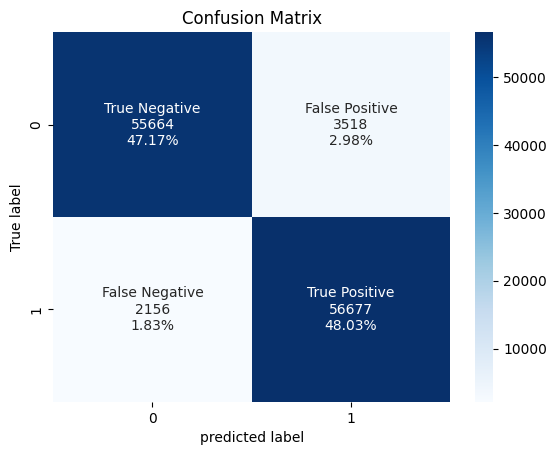

Normalized confusion matrix


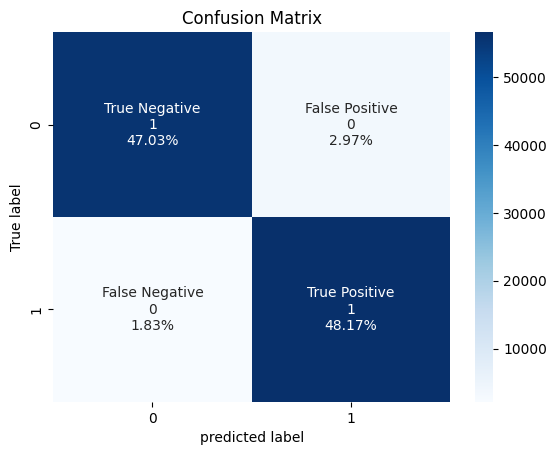

[[55664  3518]
 [ 2156 56677]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     59182
           1       0.94      0.96      0.95     58833

    accuracy                           0.95    118015
   macro avg       0.95      0.95      0.95    118015
weighted avg       0.95      0.95      0.95    118015

accuracy_score :  95.192136592806


In [36]:
model_1 = RandomForestClassifier(n_estimators=100)
algorithm(model_1)

confusion matrix


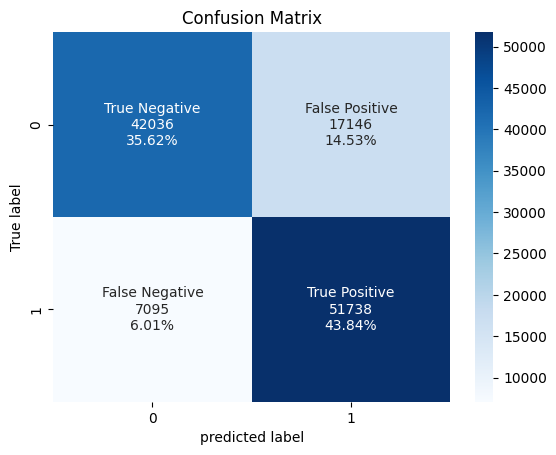

Normalized confusion matrix


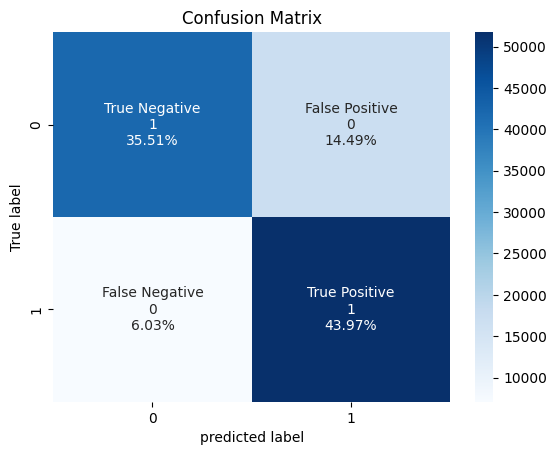

[[42036 17146]
 [ 7095 51738]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.78     59182
           1       0.75      0.88      0.81     58833

    accuracy                           0.79    118015
   macro avg       0.80      0.79      0.79    118015
weighted avg       0.80      0.79      0.79    118015

accuracy_score :  79.45939075541246


In [37]:
model_2 = LogisticRegression()
algorithm(model_2)

confusion matrix


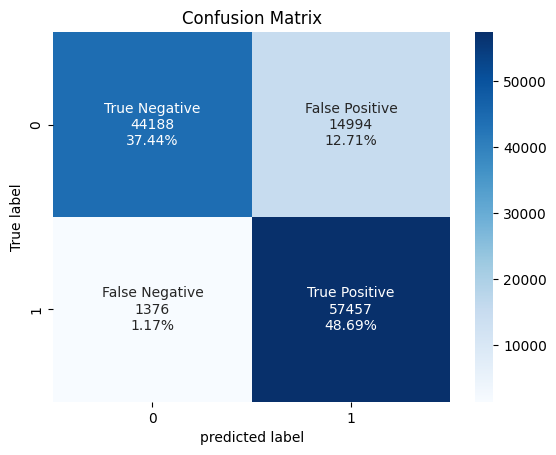

Normalized confusion matrix


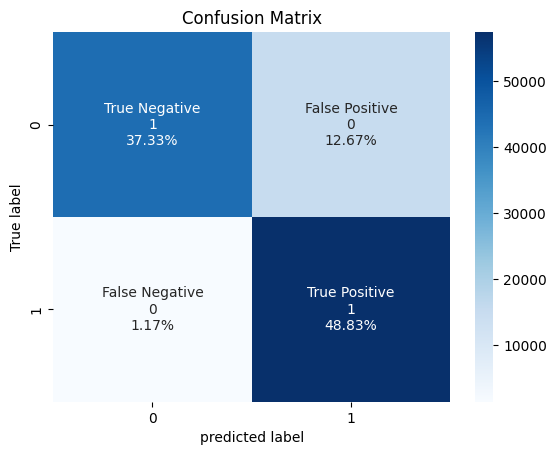

[[44188 14994]
 [ 1376 57457]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     59182
           1       0.79      0.98      0.88     58833

    accuracy                           0.86    118015
   macro avg       0.88      0.86      0.86    118015
weighted avg       0.88      0.86      0.86    118015

accuracy_score :  86.1288819217896


In [38]:
model_3 = xgb.XGBClassifier()
algorithm(model_3)

In [39]:
score = pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy })
score

,Algorithm,Accuracy
0,RandomForestClassifier,95.192137
1,LogisticRegression,79.459391
2,XGBoost,86.128882


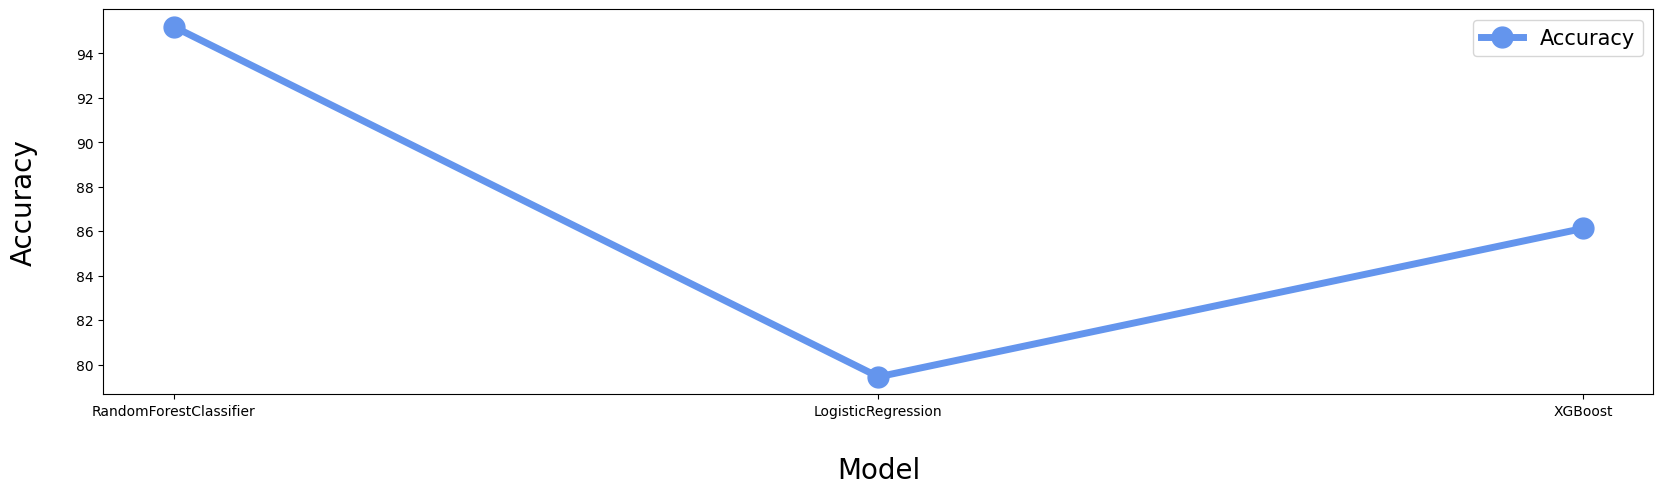

In [40]:
fig = plt.figure(figsize=(20,5))
plt.plot(score.Algorithm,score.Accuracy,label='Accuracy',lw=5,color='CornflowerBlue',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Accuracy\n',fontsize= 20)
plt.show()